# Greenspace metrics within Greater Manchester Area

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geopandas.tools import sjoin

In [2]:
# read Geopackage containing GM boundary
gm_boundaries = gpd.read_file("thesis_project/data/GM_Boundary.gpkg")
gm_boundaries.head()

,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2,geometry
0,1,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98,"MULTIPOLYGON (((406087.197 404640.102, 406041...."


<AxesSubplot:>

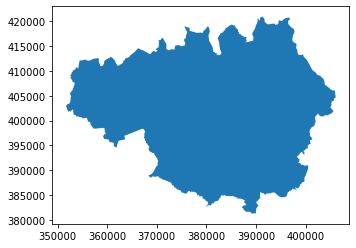

In [3]:
# plot GM boundary
gm_boundaries.plot()

In [4]:
# Greater Manchester Area boundaries
gm_boundaries.bounds

,minx,miny,maxx,maxy
0,351662.603729,381165.401794,406087.19669,421037.698468


## 1. Greenspace metrics at 100m

In [5]:
# read GeoJSON containing geodataframe at 100m
gdf_100 = gpd.read_file("thesis_project/output/greenspace_metrics_100.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,geometry
0,0.701978,0.992861,2.968764e-16,POINT (353780.286 395706.974)
1,0.604345,0.601428,1.881630e-01,POINT (366247.996 408833.065)
2,0.704949,1.000000,2.199084e-16,POINT (403555.884 390283.490)
3,0.488456,0.465199,4.794342e-01,POINT (385813.833 395579.780)
4,0.533766,1.000000,4.015967e-16,POINT (364851.991 417160.478)


In [6]:
# join greenspace metrics and GM boundaries
gdf_100_full = sjoin(gdf_100, gm_boundaries, how='left')
gdf_100_full.head()


,NDVI_100,Greenspace%_100,Canopy%_100,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.701978,0.992861,2.968764e-16,POINT (353780.286 395706.974),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.604345,0.601428,1.881630e-01,POINT (366247.996 408833.065),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.704949,1.000000,2.199084e-16,POINT (403555.884 390283.490),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.488456,0.465199,4.794342e-01,POINT (385813.833 395579.780),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
4,0.533766,1.000000,4.015967e-16,POINT (364851.991 417160.478),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# take rows where 'index_right' is not NaN
gdf_100 = gdf_100_full[gdf_100_full['index_right'].notna()].reset_index(drop=True)
#gdf_100 = gdf_100.reset_index(drop=True)
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.604345,0.601428,0.188163,POINT (366247.996 408833.065),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
1,0.488456,0.465199,0.479434,POINT (385813.833 395579.780),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.692624,0.805473,0.205100,POINT (386030.989 413487.405),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
3,0.456658,0.837002,0.114089,POINT (358245.324 404183.111),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
4,0.466913,0.389054,0.269682,POINT (378537.192 392738.452),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98


In [8]:
# check how many points within GM with three metrics
len(gdf_100)

5878

In [9]:
# keep target columns
gdf_100 = gdf_100[['NDVI_100', 'Greenspace%_100', 'Canopy%_100', 'geometry']]
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,geometry
0,0.604345,0.601428,0.188163,POINT (366247.996 408833.065)
1,0.488456,0.465199,0.479434,POINT (385813.833 395579.780)
2,0.692624,0.805473,0.205100,POINT (386030.989 413487.405)
3,0.456658,0.837002,0.114089,POINT (358245.324 404183.111)
4,0.466913,0.389054,0.269682,POINT (378537.192 392738.452)


In [10]:
# save geodataframe to geojson
gdf_100.to_file("thesis_project/output/greenspace_metrics_100_gm.json", driver="GeoJSON")

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# 2. Greenspace metrics at 300m

In [11]:
# read GeoJSON containing geodataframe at 300m
gdf_300 = gpd.read_file("thesis_project/output/greenspace_metrics_300.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry
0,0.485173,0.528844,4.424253e-01,POINT (384713.357 394255.209)
1,0.285426,0.293025,2.477889e-01,POINT (387034.589 396075.398)
2,0.462789,0.462798,4.641527e-01,POINT (395300.134 404726.178)
3,0.672780,0.999452,4.089324e-16,POINT (366481.480 381239.565)
4,0.855025,0.999178,4.203677e-16,POINT (392473.837 382347.228)


In [12]:
# join greenspace metrics and GM boundaries
gdf_300_full = sjoin(gdf_300, gm_boundaries, how='left')
gdf_300_full.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.485173,0.528844,4.424253e-01,POINT (384713.357 394255.209),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
1,0.285426,0.293025,2.477889e-01,POINT (387034.589 396075.398),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.462789,0.462798,4.641527e-01,POINT (395300.134 404726.178),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
3,0.672780,0.999452,4.089324e-16,POINT (366481.480 381239.565),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.855025,0.999178,4.203677e-16,POINT (392473.837 382347.228),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# take rows where 'index_right' is not NaN
gdf_300 = gdf_300_full[gdf_300_full['index_right'].notna()].reset_index(drop=True)
#gdf_300 = gdf_300.reset_index(drop=True)
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.485173,0.528844,0.442425,POINT (384713.357 394255.209),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
1,0.285426,0.293025,0.247789,POINT (387034.589 396075.398),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.462789,0.462798,0.464153,POINT (395300.134 404726.178),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
3,0.594440,0.987531,0.225635,POINT (369879.786 397440.240),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
4,0.584577,0.532749,0.220658,POINT (356385.617 406274.434),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98


In [14]:
# check how many points within GM with three metrics
len(gdf_300)

5781

In [15]:
# keep target columns
gdf_300 = gdf_300[['NDVI_300', 'Greenspace%_300', 'Canopy%_300', 'geometry']]
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry
0,0.485173,0.528844,0.442425,POINT (384713.357 394255.209)
1,0.285426,0.293025,0.247789,POINT (387034.589 396075.398)
2,0.462789,0.462798,0.464153,POINT (395300.134 404726.178)
3,0.594440,0.987531,0.225635,POINT (369879.786 397440.240)
4,0.584577,0.532749,0.220658,POINT (356385.617 406274.434)


In [16]:
# save geodataframe to geojson
gdf_300.to_file("thesis_project/output/greenspace_metrics_300_gm.json", driver="GeoJSON")

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# 3. Greenspace metrics at 500m

In [17]:
# read GeoJSON containing geodataframe at 500m
gdf_500 = gpd.read_file("thesis_project/output/greenspace_metrics_500.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry
0,0.502140,0.485566,3.393393e-01,POINT (372673.972 394848.116)
1,0.634665,0.641850,1.813280e-01,POINT (383073.527 408838.647)
2,0.974342,0.999420,3.009884e-16,POINT (401805.027 388146.712)
3,0.606910,0.969945,1.641658e-01,POINT (372549.883 390299.040)
4,0.719913,0.824603,2.948748e-01,POINT (372644.583 414079.514)


In [18]:
# join greenspace metrics and GM boundaries
gdf_500_full = sjoin(gdf_500, gm_boundaries, how='left')
gdf_500_full.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.502140,0.485566,3.393393e-01,POINT (372673.972 394848.116),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
1,0.634665,0.641850,1.813280e-01,POINT (383073.527 408838.647),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.974342,0.999420,3.009884e-16,POINT (401805.027 388146.712),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.606910,0.969945,1.641658e-01,POINT (372549.883 390299.040),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
4,0.719913,0.824603,2.948748e-01,POINT (372644.583 414079.514),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98


In [19]:
# take rows where 'index_right' is not NaN
gdf_500 = gdf_500_full[gdf_500_full['index_right'].notna()].reset_index(drop=True)
#gdf_500 = gdf_500.reset_index(drop=True)
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry,index_right,OBJECTID,NAME,DESCRIPTIO,Shape_Leng,Shape_Area,area_Km2
0,0.502140,0.485566,0.339339,POINT (372673.972 394848.116),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
1,0.634665,0.641850,0.181328,POINT (383073.527 408838.647),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
2,0.606910,0.969945,0.164166,POINT (372549.883 390299.040),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
3,0.719913,0.824603,0.294875,POINT (372644.583 414079.514),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98
4,0.710023,0.980069,0.031487,POINT (369449.827 413462.285),0.0,1.0,Greater Manchester,Ceremonial County,248706.036033,1.275981e+09,1275.98


In [20]:
# check how many points within GM with three metrics
len(gdf_500)

2881

In [21]:
# keep target columns
gdf_500 = gdf_500[['NDVI_500', 'Greenspace%_500', 'Canopy%_500', 'geometry']]
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry
0,0.502140,0.485566,0.339339,POINT (372673.972 394848.116)
1,0.634665,0.641850,0.181328,POINT (383073.527 408838.647)
2,0.606910,0.969945,0.164166,POINT (372549.883 390299.040)
3,0.719913,0.824603,0.294875,POINT (372644.583 414079.514)
4,0.710023,0.980069,0.031487,POINT (369449.827 413462.285)


In [22]:
# save geodataframe to geojson
gdf_500.to_file("thesis_project/output/greenspace_metrics_500_gm.json", driver="GeoJSON")

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
